In [2]:
import pandas as pd
import glob
from pathlib import Path
import os
from natsort import natsorted
from PIL import Image
from utils import image_grid
import random

In [3]:
def parse_answer(text):
    text = text.replace(" ", "").lower()
    if text == "yes":
        return True
    elif text == "no":
        return False
    else:
        raise ValueError

In [4]:
df = pd.read_csv("./llava_result1.csv")
for i in range(6):
    df[str(i)] = df[str(i)].apply(lambda x: parse_answer(x))
df.head()

id          source                                           img_path  \
0   0  DIV2K_valid_HR  collocation-mturk/data_preprocessed/DIV2K_vali...   
1   1  DIV2K_valid_HR  collocation-mturk/data_preprocessed/DIV2K_vali...   
2   2  DIV2K_valid_HR  collocation-mturk/data_preprocessed/DIV2K_vali...   
3   3  DIV2K_valid_HR  collocation-mturk/data_preprocessed/DIV2K_vali...   
4   4  DIV2K_valid_HR  collocation-mturk/data_preprocessed/DIV2K_vali...   

      0      1      2      3      4      5  
0  True  False  False   True  False  False  
1  True  False  False   True   True  False  
2  True  False  False   True   True  False  
3  True  False  False  False  False  False  
4  True  False  False   True  False  False

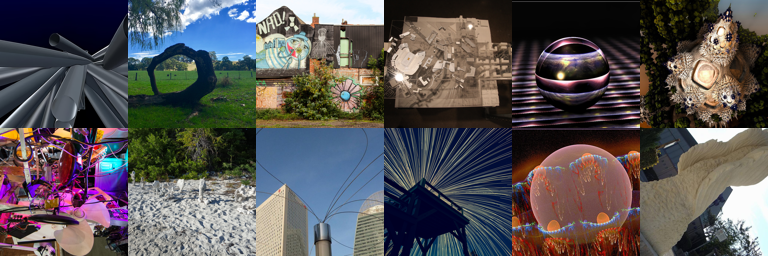

In [54]:
# QUESTIONS = [
#     "Is there at least one focal point or subject in this image?",
#     "Does the image depict something abstract?",
#     "Was the image captured with a bird's-eye view?",
#     "Was the image captured with a close-up shot?",
#     "Was the image captured with a macro shot?",
#     "Is the camera angle looking up at the sky?",
# ]

paths = df[df["1"]]["img_path"].to_numpy()

random.seed(101)
random.shuffle(paths)

images = [Image.open(Path(*Path(path).parts[1:])).resize((128, 128)) for path in paths]
# image_grid(images[:50], 5, 10)
image_grid(images[:12], 2, 6)

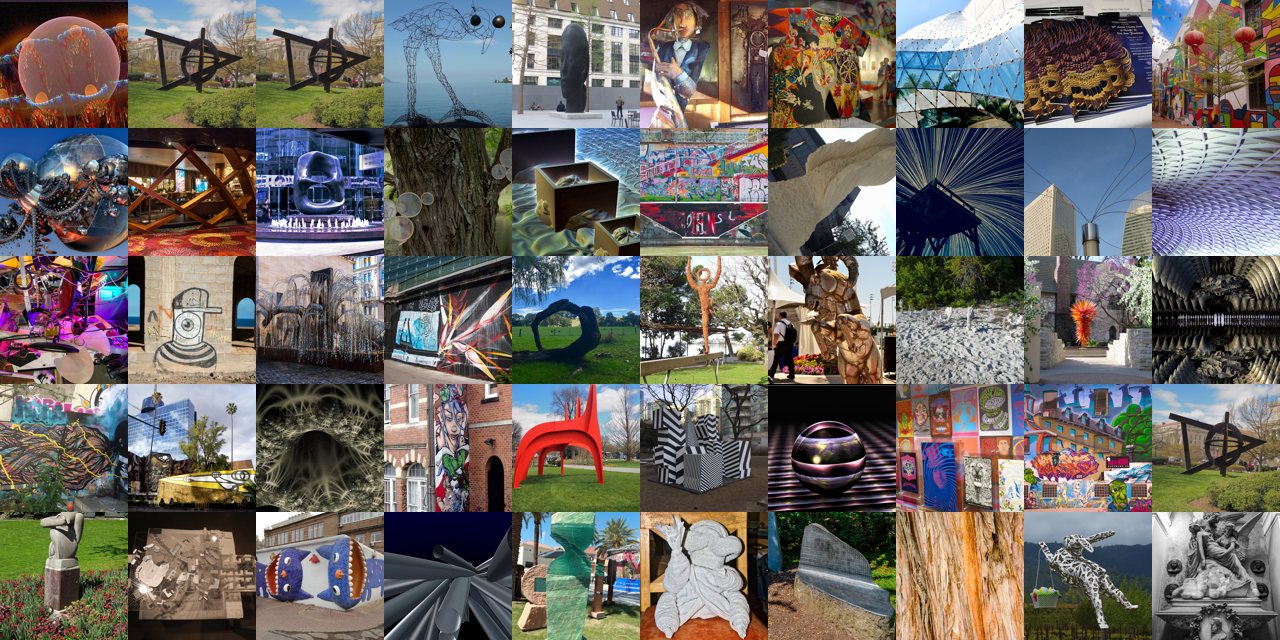

In [5]:
paths = df[df["1"]]["img_path"].to_numpy()

random.seed(0)
random.shuffle(paths)

images = [Image.open(Path(*Path(path).parts[1:])).resize((128, 128)) for path in paths]
image_grid(images[:50], 5, 10)
# image_grid(images[:12], 2, 6)

71


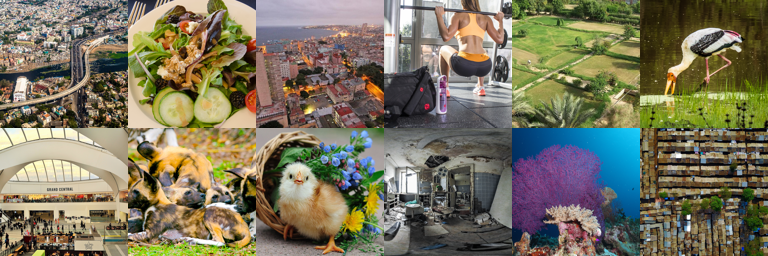

In [51]:
paths = df[df["2"]]["img_path"].to_numpy()
print(len(paths))

random.seed(0)
random.shuffle(paths)

images = [Image.open(Path(*Path(path).parts[1:])).resize((128, 128)) for path in paths]
# image_grid(images[:50], 5, 10)
image_grid(images[:12], 2, 6)

270


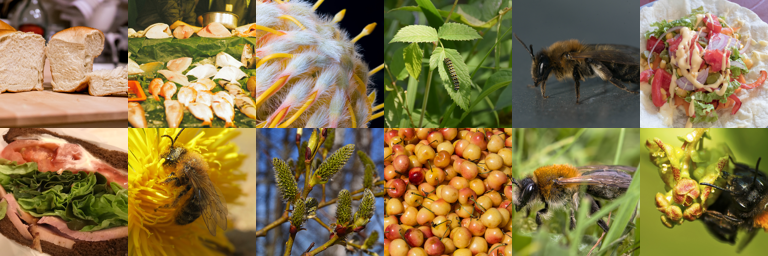

In [48]:
paths = df[df["4"]]["img_path"].to_numpy()
print(len(paths))

random.seed(0)
random.shuffle(paths)

images = [Image.open(Path(*Path(path).parts[1:])).resize((128, 128)) for path in paths]
# image_grid(images[:50], 5, 10)
image_grid(images[:12], 2, 6)

6


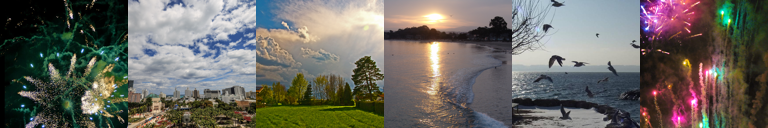

In [47]:
paths = df[df["5"]]["img_path"].to_numpy()
print(len(paths))

random.seed(0)
random.shuffle(paths)

images = [Image.open(Path(*Path(path).parts[1:])).resize((128, 128)) for path in paths]
# image_grid(images[:50], 5, 10)
image_grid(images[:6], 1, 6)

In [40]:
mask = ~(df["1"] | df["2"] | df["4"] | df["5"])
print(len(df))
print(len(df[mask]))

3201
2802


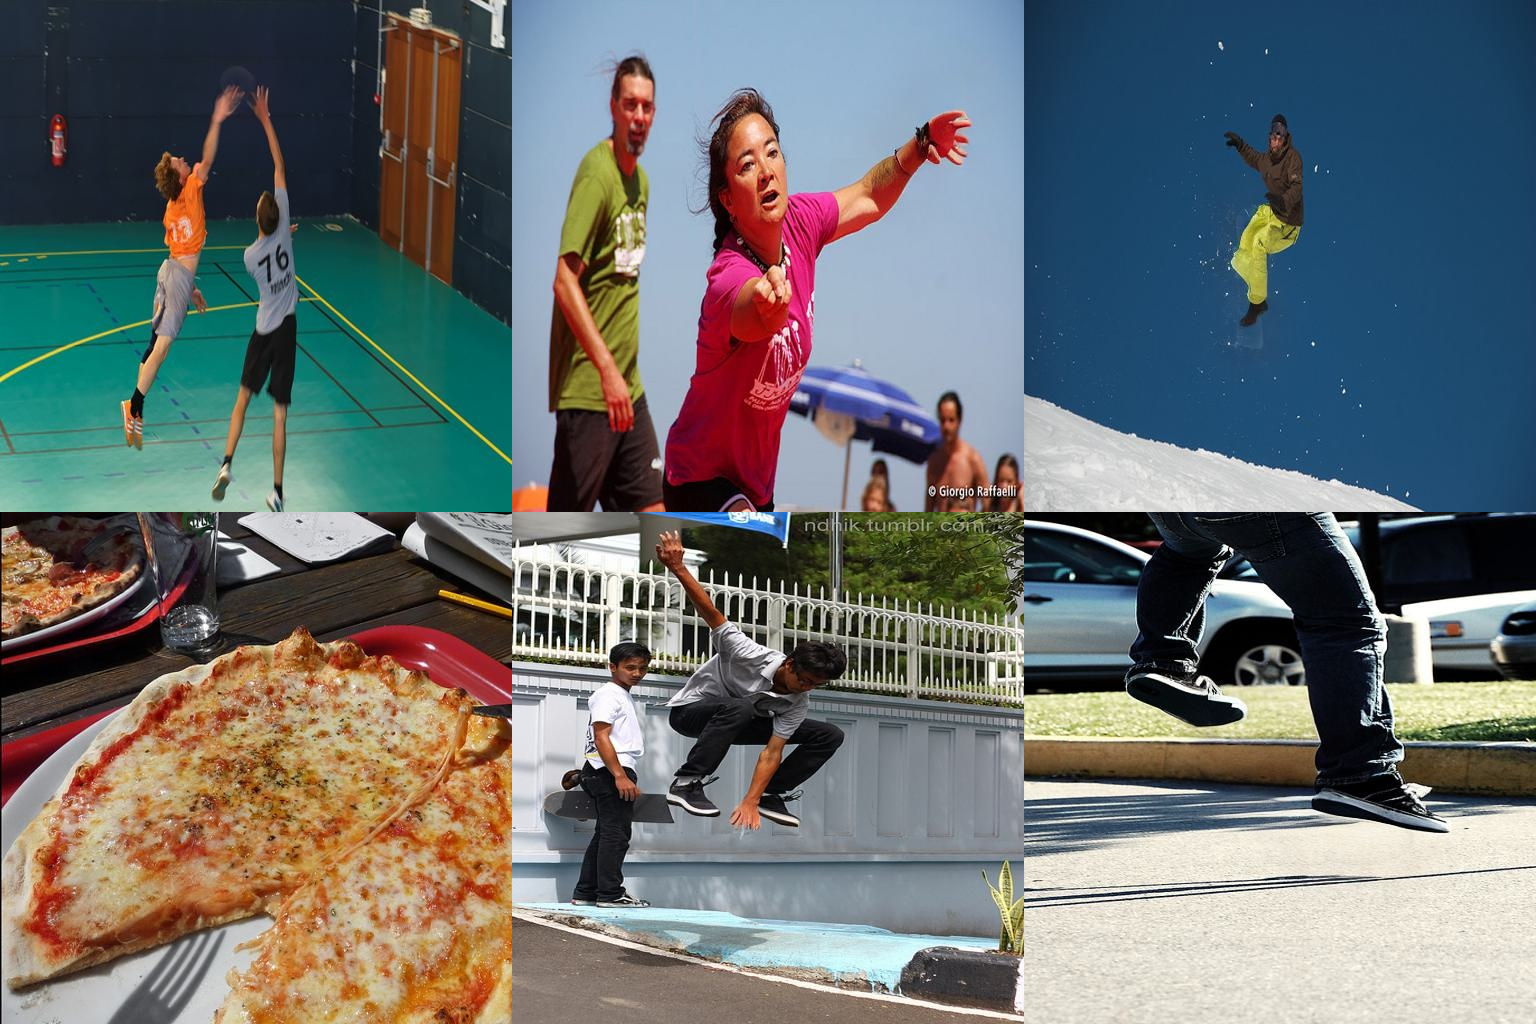

In [44]:
paths = [
    
    "../dataset_reserved/PIPE_test_set/source_img/frisbee_im_163118_604933_inpainted.jpeg",
    "../dataset_reserved/PIPE_test_set/source_img/frisbee_im_235241_602977_inpainted.jpeg",
    "../dataset_reserved/PIPE_test_set/source_img/snowboard_im_23359_615828_inpainted.jpeg",

    "../dataset_reserved/PIPE_test_set/source_img/fork_im_163611_688350_inpainted.jpeg",
    "../dataset_reserved/PIPE_test_set/source_img/skateboard_im_438907_1860907_inpainted.jpeg",
    "../dataset_reserved/PIPE_test_set/source_img/skateboard_im_261982_640130_inpainted.jpeg",
    
]
images = [Image.open(path).resize((512, 512)) for path in paths]
image_grid(images, 2, 3)

In [10]:
mask = ~(df["1"] | df["2"] | df["4"] | df["5"])
paths = df[mask]["img_path"].to_numpy()

from imagededup.methods import PHash
phasher = PHash()

dir = "./data_preprocessed/DIV2K_valid_HR"
encodings1 = phasher.encode_images(image_dir=dir)
encodings1 = {os.path.join(dir, k): v for k, v in encodings1.items()}

dir = "./data_preprocessed/Flickr2K"
encodings2 = phasher.encode_images(image_dir=dir)
encodings2 = {os.path.join(dir, k): v for k, v in encodings2.items()}

dir = "./data_preprocessed/Flickr1024_val"
encodings3 = phasher.encode_images(image_dir=dir)
encodings3 = {os.path.join(dir, k): v for k, v in encodings3.items()}

dir = "./data_preprocessed/HRWSI_val"
encodings4 = phasher.encode_images(image_dir=dir)
encodings4 = {os.path.join(dir, k): v for k, v in encodings4.items()}

encodings = encodings1
encodings.update(encodings2)
encodings.update(encodings3)
encodings.update(encodings4)

2024-07-18 06:32:09,218: INFO Start: Calculating hashes...
100%|██████████| 100/100 [00:03<00:00, 32.59it/s]
2024-07-18 06:32:13,144: INFO End: Calculating hashes!
2024-07-18 06:32:13,203: INFO Start: Calculating hashes...
100%|██████████| 2650/2650 [02:11<00:00, 20.10it/s] 
2024-07-18 06:34:26,007: INFO End: Calculating hashes!
2024-07-18 06:34:26,012: INFO Start: Calculating hashes...
100%|██████████| 112/112 [00:04<00:00, 24.01it/s]
2024-07-18 06:34:31,555: INFO End: Calculating hashes!
2024-07-18 06:34:31,561: INFO Start: Calculating hashes...
100%|██████████| 400/400 [00:23<00:00, 17.09it/s]
2024-07-18 06:34:55,845: INFO End: Calculating hashes!


In [11]:
duplicates = phasher.find_duplicates(encoding_map=encodings)
img_unique = []
excluded = set()
for k, v in duplicates.items():
    if len(v) == 0:
        img_unique.append(k)
    elif k not in excluded:
        excluded.update(set(v))
        img_unique.append(k)

print(len(img_unique))
print(len(duplicates))

if len(img_unique) >= 1000:
    print("Done!")

/data2/worameth/DiffSpatial2/envs/diff-spatial/lib/python3.10/site-packages/imagededup/methods/hashing.py:317: RuntimeWarning: Parameter num_enc_workers has no effect since encodings are already provided
  warnings.warn('Parameter num_enc_workers has no effect since encodings are already provided', RuntimeWarning)
2024-07-18 06:35:06,665: INFO Start: Evaluating hamming distances for getting duplicates
2024-07-18 06:35:06,666: INFO Start: Retrieving duplicates using Cython Brute force algorithm
100%|██████████| 3262/3262 [00:00<00:00, 13235.38it/s]
2024-07-18 06:35:07,756: INFO End: Retrieving duplicates using Cython Brute force algorithm
2024-07-18 06:35:07,757: INFO End: Evaluating hamming distances for getting duplicates


3200
3262
Done!


In [25]:
all_paths = df["img_path"].to_numpy()

missing_paths = []
for path in img_unique:
    if path.replace("./", "collocation-mturk/") not in all_paths:
        missing_paths.append(path.replace("./", "collocation-mturk/"))

len(missing_paths)

61

In [26]:
import pickle

with open("missing_paths.pickle", "wb") as f:
    pickle.dump(missing_paths, f)

In [27]:
with open("missing_paths.pickle", "rb") as f:
    xxx = pickle.load(f)

xxx

['collocation-mturk/data_preprocessed/HRWSI_val/DSCF0652.png',
 'collocation-mturk/data_preprocessed/HRWSI_val/Sharjah-17.png',
 'collocation-mturk/data_preprocessed/HRWSI_val/DSCF7616.png',
 'collocation-mturk/data_preprocessed/HRWSI_val/Wakarusa2015-0105.png',
 'collocation-mturk/data_preprocessed/HRWSI_val/Krk-18.png',
 'collocation-mturk/data_preprocessed/HRWSI_val/Windhoek-08.png',
 'collocation-mturk/data_preprocessed/HRWSI_val/Makarska-23.png',
 'collocation-mturk/data_preprocessed/HRWSI_val/Zadar-53.png',
 'collocation-mturk/data_preprocessed/HRWSI_val/Wakarusa2015-0195.png',
 'collocation-mturk/data_preprocessed/HRWSI_val/Rovinji-01.png',
 'collocation-mturk/data_preprocessed/HRWSI_val/Primosten-11.png',
 'collocation-mturk/data_preprocessed/HRWSI_val/Ludmila03.png',
 'collocation-mturk/data_preprocessed/HRWSI_val/Ljubljana-06.png',
 'collocation-mturk/data_preprocessed/HRWSI_val/DSCF1498.png',
 'collocation-mturk/data_preprocessed/HRWSI_val/Glitchcon2014B2-0098.png',
 'colloc